### Clustering metrics are
When ground truth values are not known,the following metrics are used<br>
1) Silhouette Score<br>
2) Davies Bouldini Score<br>
3) Calinski-Harabasz Index<br>

When ground truth values are known,the following metrics are used<br>
1) Mutual Information scores<br>
2) Homogeneity, completeness and V-measure<br>

#### Clustering Metrics Sklearn
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Silhoutte Score
a) The Silhouette Score and Silhouette Plot are used to measure the separation distance between clusters. <br>
b) It displays a measure of how close each point in a cluster is to points in the neighbouring clusters. <br>
c) This measure has a range of [-1, 1] and is a great tool to visually inspect the similarities within clusters and differences across clusters.<br>
d) The Silhouette Score is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b-a) / max(a,b).<br>
e) b is the distance between each sample and the nearest cluster that the sample is not a part of while a is the mean distance within each cluster.<br>

#### silhoutte score = (b-a)/max(b,a)

a: The mean distance between a sample and all other points in the same class/cluster<br>
b: The mean distance between a sample and all other points in the next nearest cluster<br>

a is also called cohesion. a should be small<br>
b is also called separation. b should be large<br>

A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

<img src="silhoutte_score.jpg">

<img src="silhoutte_score2.png" width="400" height="500">

In [2]:
a = 4
b = 7
sil_sc = (b-a)/max(b,a)
print('Silhoutte Score',sil_sc)
print(3/7)

Silhoutte Score 0.42857142857142855
0.42857142857142855


In [3]:
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
a = np.random.random((40,2))
b = 2 + np.random.random((40,2))
data = np.concatenate((a,b))
print(a.shape)
print(b.shape)
print(data.shape)

(40, 2)
(40, 2)
(80, 2)


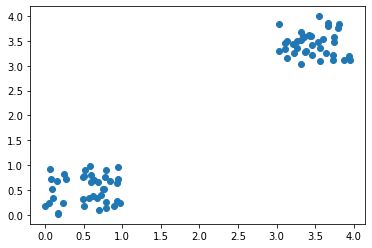

In [8]:
plt.scatter(data[:,0],data[:,1])
plt.show()

In [9]:
from sklearn.cluster import KMeans

WCSS
 [354.06524139607143, 11.482452688601583, 8.609184206306903, 6.787612905784936, 5.184128916341, 4.039567011559976, 3.0553716399481514, 2.5009572220497622, 2.196122323726211]


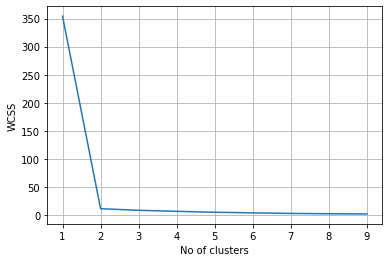

In [11]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,10): # i = no of clusters,
    m = KMeans(n_clusters=i)
    m.fit(data)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,10)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

In [14]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i).fit(data)
    print(f'Silhoutte Score at K={i}',silhouette_score(data,m.labels_))

Silhoutte Score at K=2 0.8827933605161654
Silhoutte Score at K=3 0.6545496871944148
Silhoutte Score at K=4 0.38968118648596917
Silhoutte Score at K=5 0.38343620730744526
Silhoutte Score at K=6 0.40071452381729883
Silhoutte Score at K=7 0.4229241278745349
Silhoutte Score at K=8 0.44239767139930797
Silhoutte Score at K=9 0.42237544266025645


In [ ]:
# In CMD
# pip install yellowbrick

# In Jupyter
# !pip install yellowbrick

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer

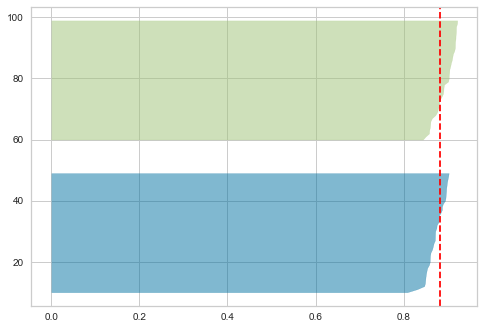

In [17]:
model = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data) 
plt.show()

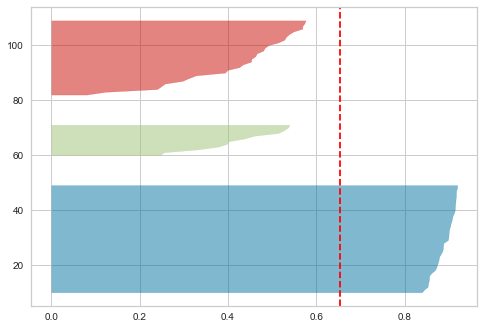

In [18]:
m3 = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(m3, colors='yellowbrick')
visualizer.fit(data) 
plt.show()

In [19]:
from collections import Counter

In [20]:
ypred3 = m3.predict(data)
c1 = Counter(ypred3)
print(c1)

Counter({0: 40, 2: 28, 1: 12})


#### KMeans at K=2

In [22]:
k2 = KMeans(n_clusters=2)
k2.fit(data)
ypred2 = k2.predict(data)
print(ypred2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [23]:
cent2 = k2.cluster_centers_
print(cent2)

[[3.46396232 3.44688128]
 [0.54070892 0.51708111]]


In [28]:
import seaborn as sns

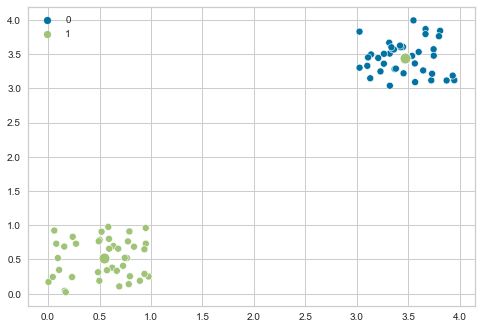

In [32]:
sns.scatterplot(x=data[:,0],y=data[:,1],hue=ypred2)
sns.scatterplot(x=cent2[:,0],y=cent2[:,1],palette='viridis',markers='*',s=120)
plt.show()

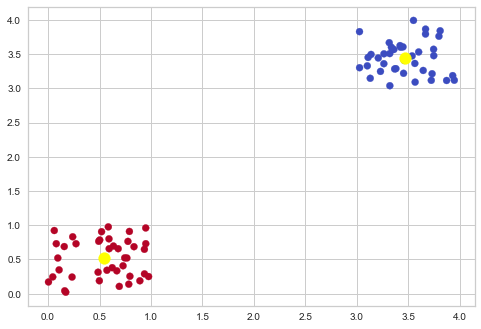

In [42]:
plt.scatter(data[:,0],data[:,1],c=ypred2,cmap='coolwarm')
plt.scatter(cent2[:,0],cent2[:,1],color='yellow',s=140,marker='o')
plt.show()

### Optimal number of clusters = 2